<div style="border-width:9; border-style: solid;font: 10pt 'Candara';font-weight:bold;text-align: center"><h1>    Task description : </h1></div>

**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [137]:
data_path = "../Data/train.csv"
data = pd.read_csv(data_path)

In [138]:
data.shape

(103904, 25)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

You may notice the following:
<ol>
     <li><b>The column</b> corresponding to the <b>Arrival Delay in Minutes feature has 310 missing values</b>.</li>
     <li><b>The first two features are useless and will not affect the classification</b>, so we should get rid of them.</li>
     <li><b>Many columns contain categorical values</b> but are of type 'object' or 'int64'. Let's replace this type with a special one designed for storing categorical values.</li>
</ol>

In [140]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [141]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
for col in data.columns[categorical_indexes]:
    data[col] = data[col].astype('category')

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [143]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [144]:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


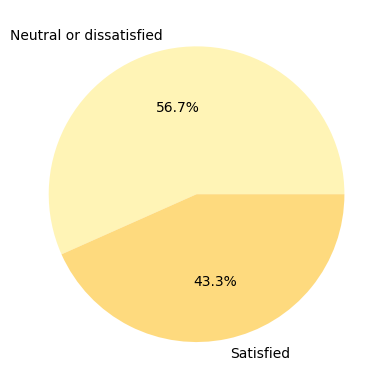

In [145]:
plt.pie(data.satisfaction.value_counts(),
        labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("YlOrBr"),
        autopct = '%1.1f%%')
pass

In [146]:
quantitative_data = data.select_dtypes(include=['float64', 'int64'])
corr_mat = quantitative_data.corr()
corr_mat


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


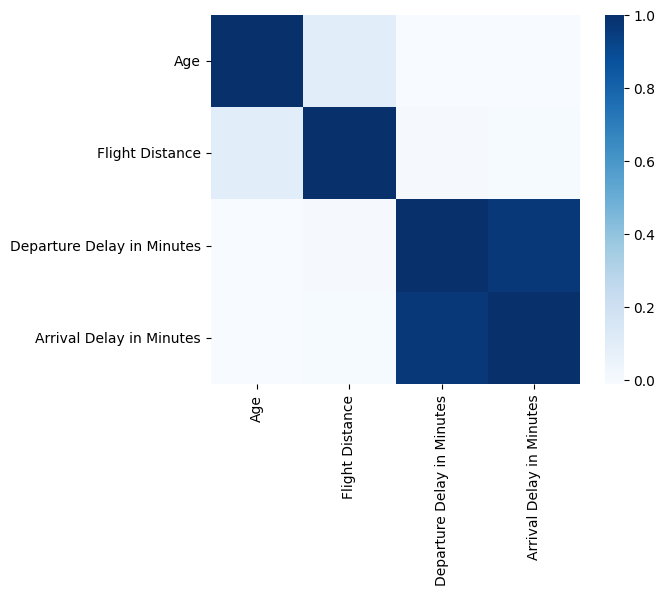

In [147]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

You can see that there is a strong correlation between the features <em>'Departure delay in minutes'</em> and <em>'Arrival delay in minutes'</em>. The value of the correlation coefficient reaches the following value:

In [148]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
dtype: float64

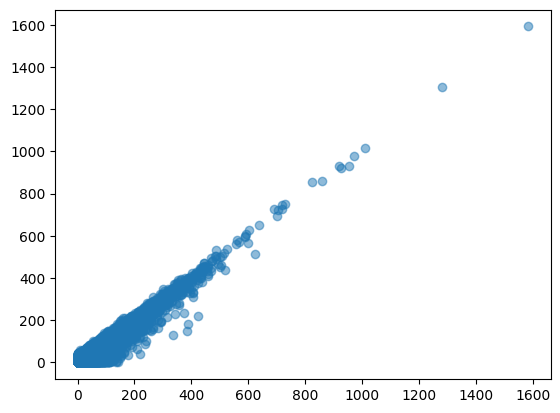

In [149]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
pass

You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation <b>the dependence of the arrival time delay on the departure time delay is linear</b>.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

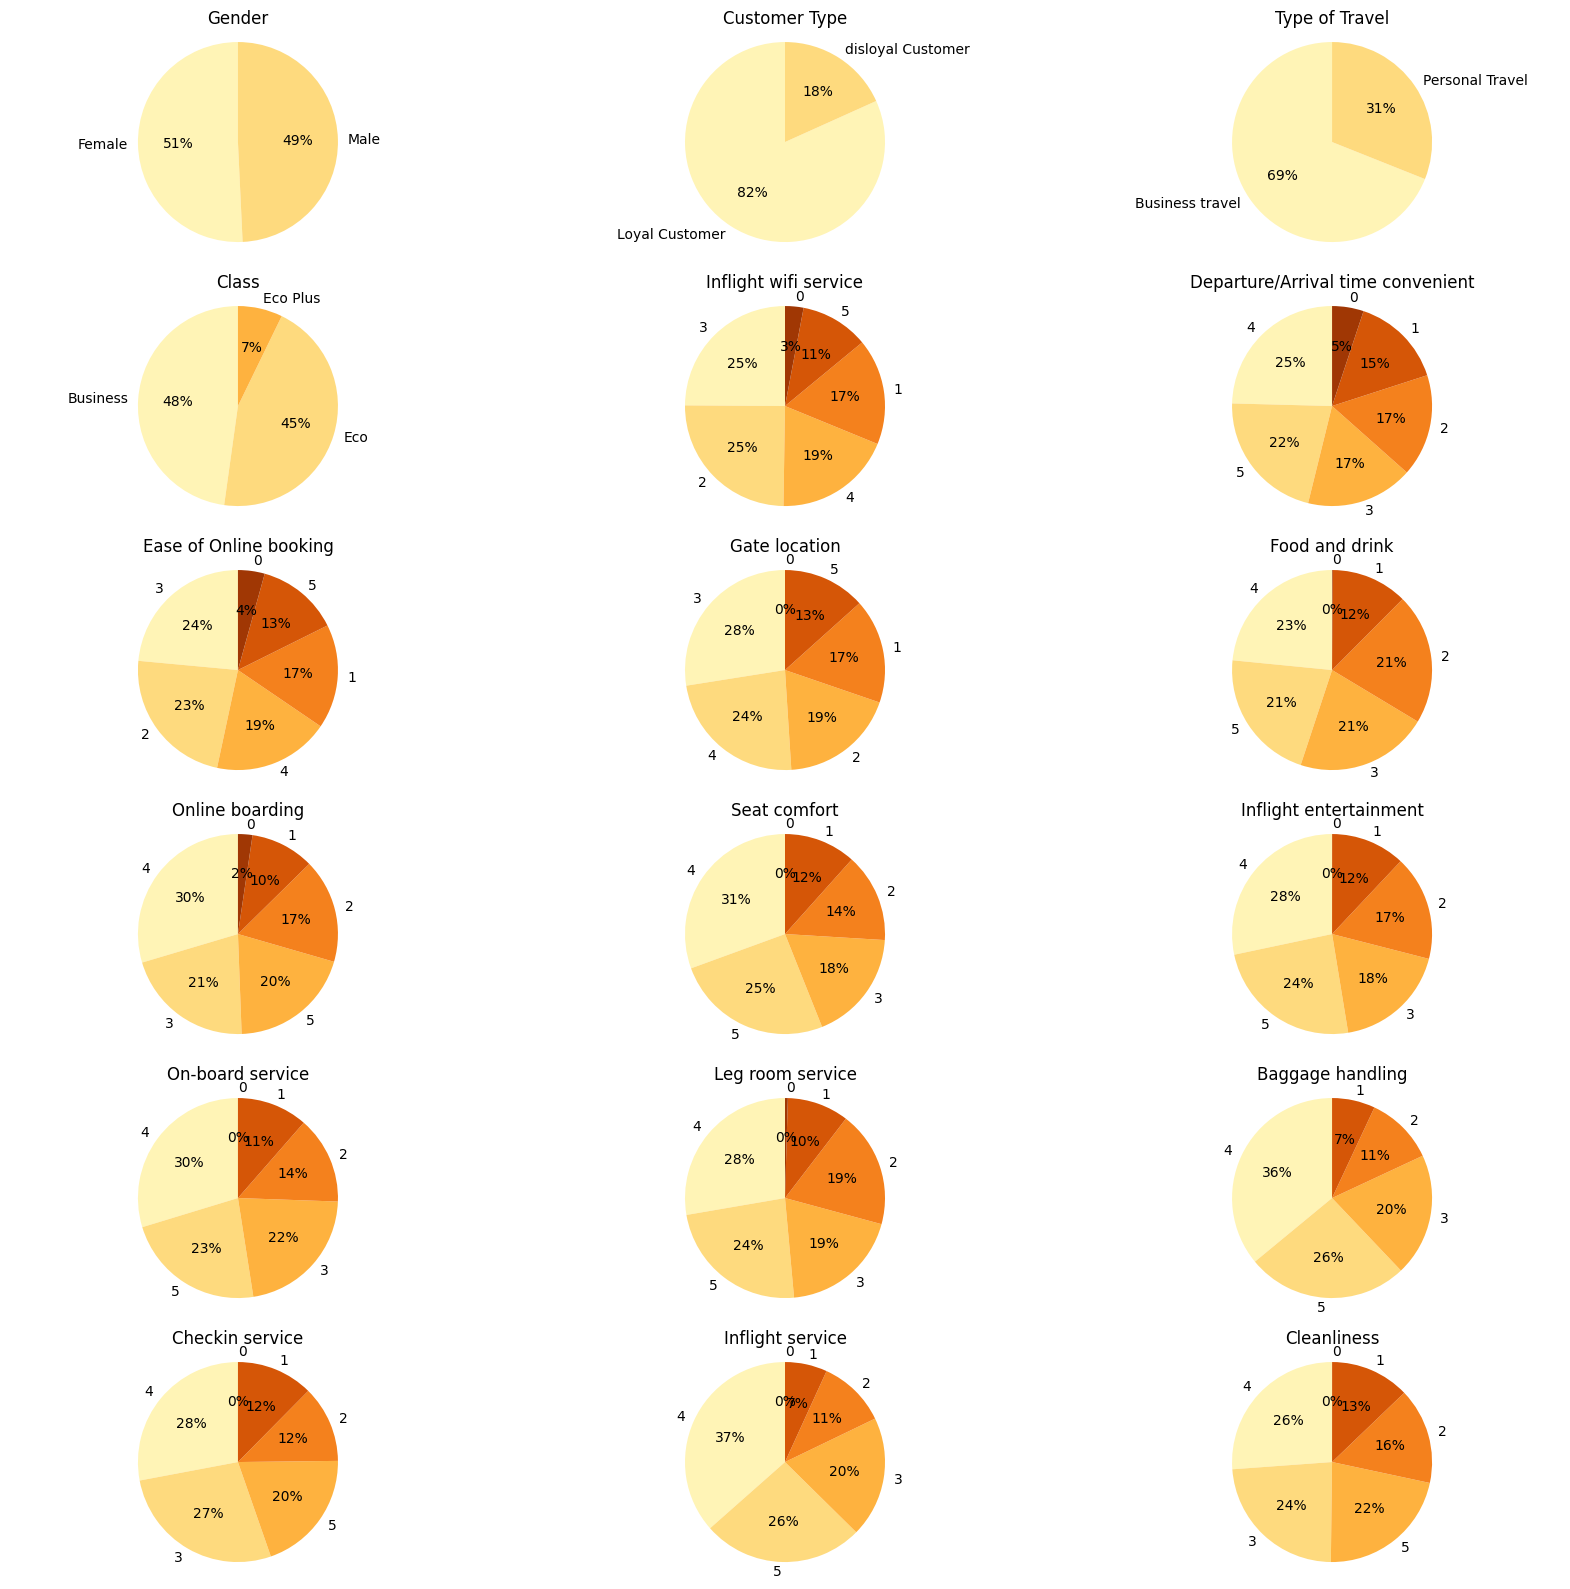

In [150]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Some conclusions about the considered sample:
<ul>
    <li>The number of men and women in this sample is approximately the same</li>
    <li>The vast majority of the airline's customers are repeat customers</li>
    <li>Most of our clients flew for business rather than personal reasons</li>
    <li>About half of the passengers were in business class</li>
    <li>More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)</li>
    <li>More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)</li>
</ul>

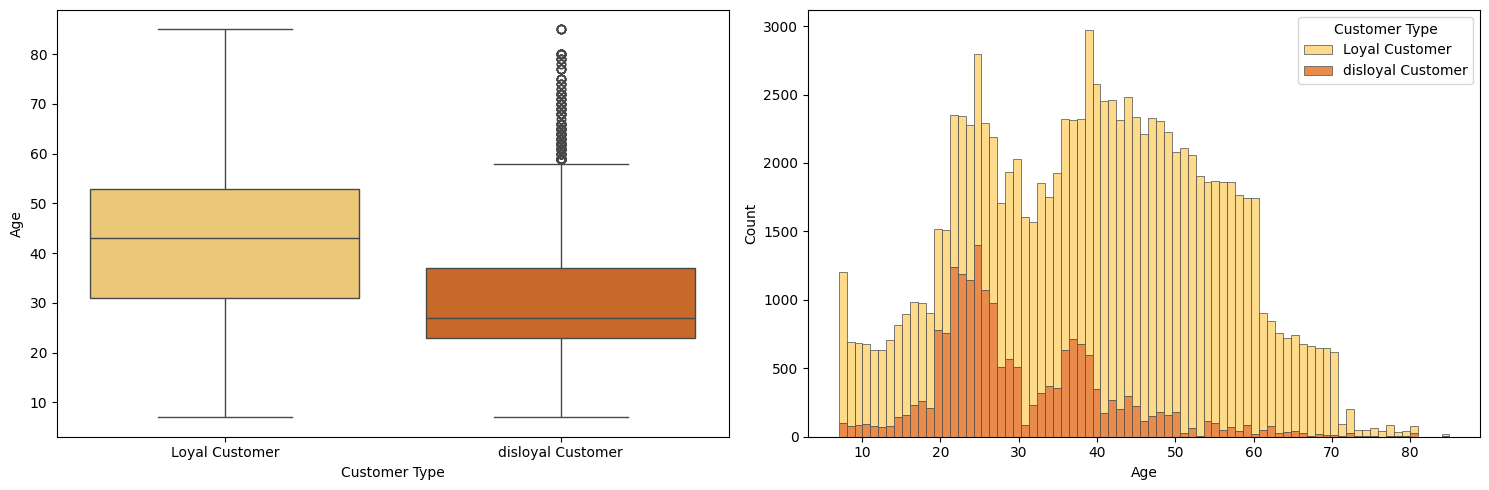

In [151]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(
    x="Customer Type",
    y="Age",
    hue="Customer Type",  # required for palette in future versions
    palette="YlOrBr",
    data=data,
    ax=ax[0],
    legend=False
)
sns.histplot(
    data=data,
    x="Age",
    hue="Customer Type",
    multiple="stack",
    palette="YlOrBr",
    edgecolor=".3",
    linewidth=.5,
    ax=ax[1]
)

plt.tight_layout()
plt.show()


From this box diagram, we can conclude that <b>most of the airline's regular customers are between the ages of 30 and 50 (their average age is slightly over 40)</b>. The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).

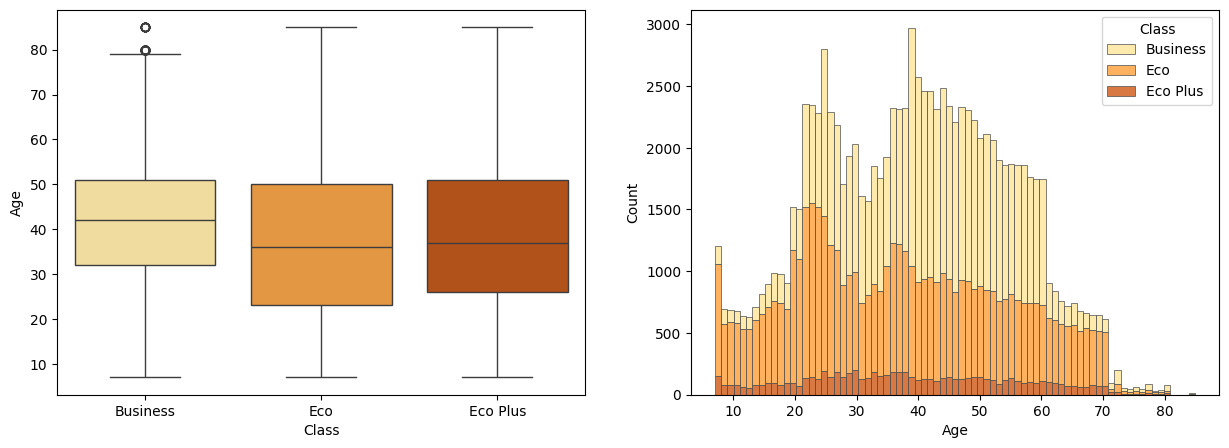

In [152]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(
    x="Class",
    y="Age",
    hue="Class",
    palette="YlOrBr",
    data=data,
    ax=ax[0],
    legend=False
)
sns.histplot(
    data=data,
    x="Age",
    hue="Class",
    multiple="stack",
    palette="YlOrBr",
    edgecolor=".3",
    linewidth=0.5,
    ax=ax[1]
)
plt.show()


It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that <b>regular customers mainly buy business class for themselves</b>.

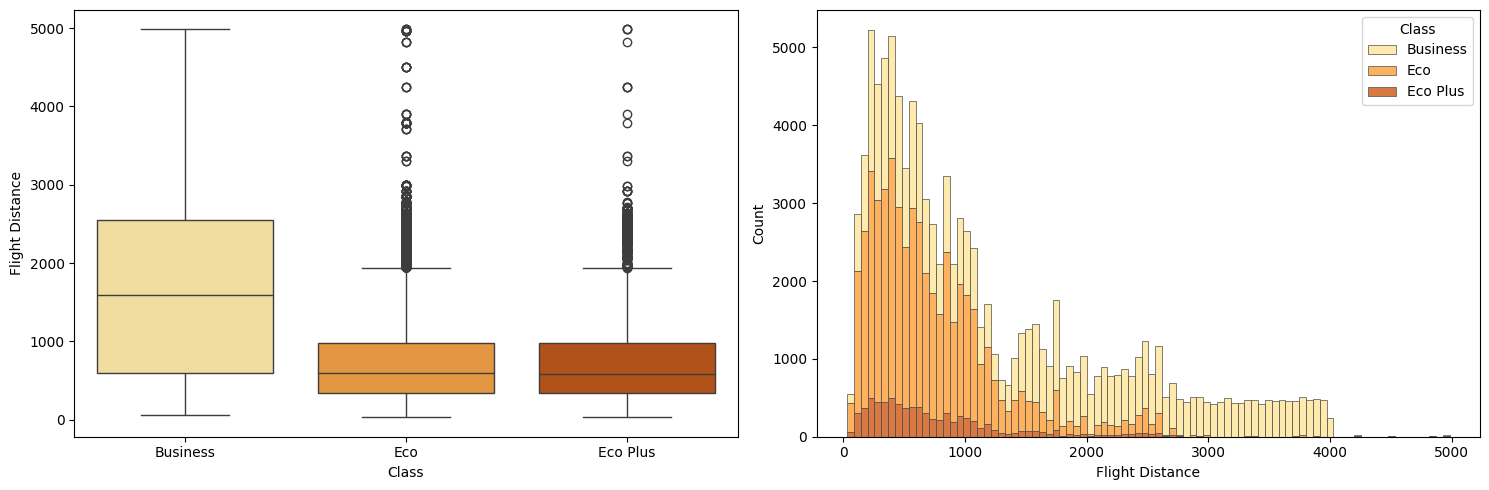

In [153]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(
    x="Class",
    y="Flight Distance",
    hue="Class",  # same as x
    palette="YlOrBr",
    data=data,
    ax=ax[0],
    legend=False  # avoids duplicate legend
)
sns.histplot(
    data=data,
    x="Flight Distance",
    hue="Class",
    multiple="stack",
    palette="YlOrBr",
    edgecolor=".3",
    linewidth=0.5,
    ax=ax[1]
)

plt.tight_layout()
plt.show()

From this box diagram, the following conclusion can be drawn: <b>customers whose flight distance is long, mostly fly in business class</b>.

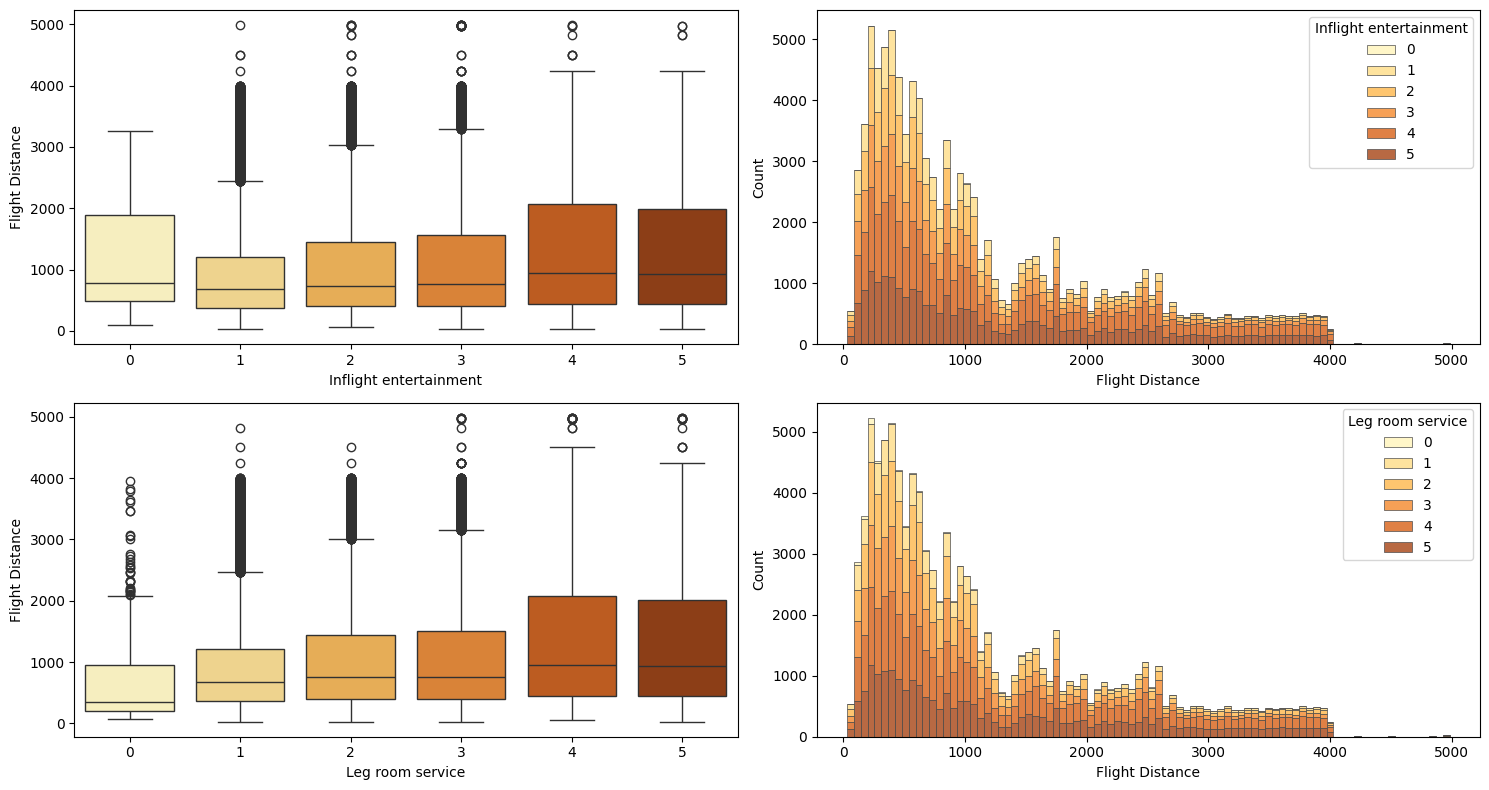

In [154]:
f, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.boxplot(
    x="Inflight entertainment",
    y="Flight Distance",
    hue="Inflight entertainment",
    palette="YlOrBr",
    data=data,
    ax=ax[0, 0],
    legend=False
)

sns.histplot(
    data=data,
    x="Flight Distance",
    hue="Inflight entertainment",
    multiple="stack",
    palette="YlOrBr",
    edgecolor=".3",
    linewidth=0.5,
    ax=ax[0, 1]
)

sns.boxplot(
    x="Leg room service",
    y="Flight Distance",
    hue="Leg room service",
    palette="YlOrBr",
    data=data,
    ax=ax[1, 0],
    legend=False
)

sns.histplot(
    data=data,
    x="Flight Distance",
    hue="Leg room service",
    multiple="stack",
    palette="YlOrBr",
    edgecolor=".3",
    linewidth=0.5,
    ax=ax[1, 1]
)

plt.tight_layout()
plt.show()

The following pattern can be seen: <b>the more distance an aircraft passenger travels (respectively, the longer they are in flight), the more they are satisfied with the entertainment in flight and the extra legroom (on average)</b>.

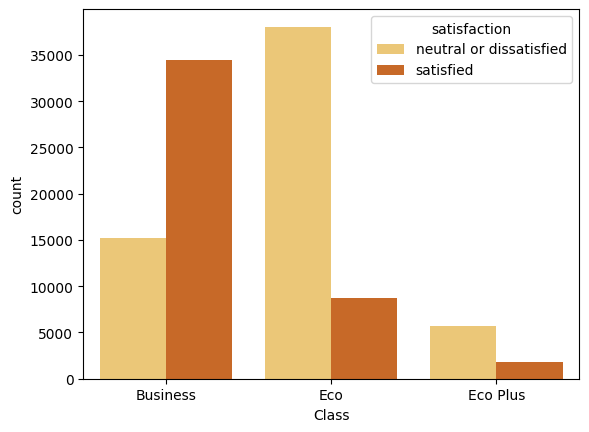

In [155]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

This chart is very revealing. You can see that <b>most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied</b>.

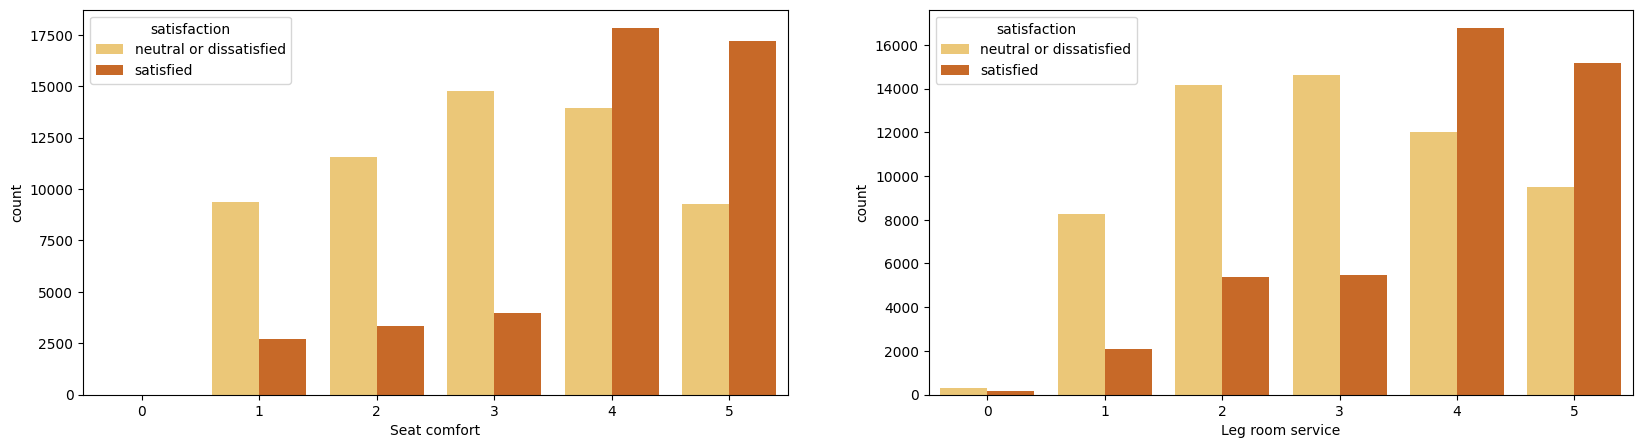

In [156]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()


From the graphs above, we can conclude the following: <b>most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight</b>.

In [157]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64